### Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. It is particularly effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples.

#### Concept

SVM works by finding the ***hyperplane*** that best divides a dataset into classes. The goal is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest data points are known as support vectors.

#### Objective Function

The optimization problem for a linear SVM can be expressed as:

$$
\text{Minimize } \frac{1}{2} \|w\|^2
$$

subject to the constraints:

$$
y_i (w \cdot x_i + b) \geq 1 \quad \text{for all } i
$$

Where:
$$
\begin{array}{ll}
w & \text{is the weight vector (normal to the hyperplane)} \\
b & \text{is the bias term} \\
y_i & \text{is the class label of the } i \text{-th sample} \\
x_i & \text{is the feature vector of the } i \text{-th sample}
\end{array}
$$

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Custom thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)

# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({
    'Thresholds': thresholds, 
    'TruePositive': tps, 
    'FalsePositive': fps,
    'TrueNegative': tns, 
    'FalseNegative': fns
})

# Calculate recall, precision, and F1 score
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])


In [5]:
df_confusion_matrix

,Thresholds,TruePositive,FalsePositive,TrueNegative,FalseNegative,recall,precision,f1_score
0,0.0,108,63,0,0,1.000000,0.631579,0.774194
1,0.1,107,9,54,1,0.990741,0.922414,0.955357
2,0.2,107,6,57,1,0.990741,0.946903,0.968326
3,0.3,107,5,58,1,0.990741,0.955357,0.972727
4,0.4,107,4,59,1,0.990741,0.963964,0.977169
5,0.5,107,2,61,1,0.990741,0.981651,0.986175
6,0.6,105,1,62,3,0.972222,0.990566,0.981308
7,0.7,104,1,62,4,0.962963,0.990476,0.976526
8,0.8,100,1,62,8,0.925926,0.990099,0.956938
9,0.9,96,0,63,12,0.888889,1.000000,0.941176


In [6]:
# Import the graph_objects module from the Plotly library
import plotly.graph_objects as go

# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_metrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(2)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

Confusion Matrix:
 [[ 60   3]
 [  2 106]]
Precision: 0.9725
Recall: 0.9815
F1 Score: 0.9770
Accuracy: 0.9708


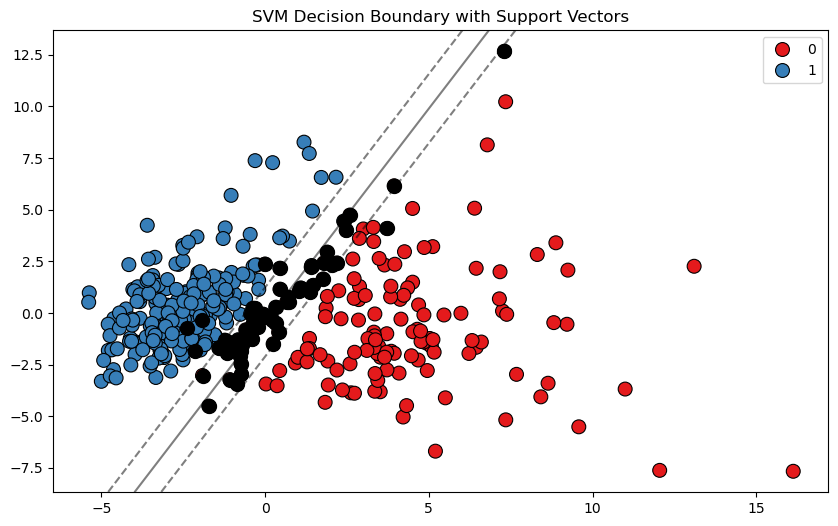

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Initialize and train the SVM model
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test_reduced)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train, palette='Set1', s=100, edgecolor='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='black', edgecolors='k')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()


In [56]:
support_vector_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])